<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>

<br>

<br>
Weriko
<br>
AndresTY
<br>
<br>

<br>

<br>
</FONT>
</p>

## Introducción

<p style="line-height:2">Python is one of the most used computational tools in the scientific area, due to two factors. Python has a readable structure that allows for a fast development cycle. On the other hand, Python has the ability to use modules in low level environments such as C/C++ and Fortran for accessing internal components.</p>
    
    
<p style="line-height:2">Since python is an interpreted language, low-level tasks tend to be slow, so resources such as low-level loops are unfeasible. This is why NumPy can help on eliminating the need to use such loops. However, sometimes there are speedups that can't be easily obtained with just Numpy, so using tools like Cython can be of great help</p>
    
    
<p style="line-height:2">Fundamentally, Cython will compile Python code directly into C, then link it into Python for use. With this, Cython allows to use the execution speed of C in a Python code.
We will be using a customized Tester class for ease of use (can be found within the repositories files)</p>

## Neural Network (gradient descent)

The concept of neural networks has been around for some time now, being proposed for the first time in the 1940s. They are inspired in the structure and inner workings of the human brain, reason for the name. 

The general structure of a basic neural network is:

| 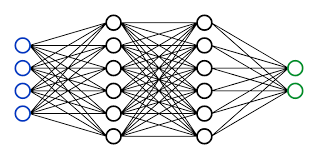 |
|:--:| 
| *(Zhou, v. 2019)*|

Where it has an input layer, hidden layers and an output layer

The operations to get from an input X to an output y are defined as follows (forward propagation):
________

X is a vector containing the values of previous layer

W is a matrix containing the weights of the $L_{n-1},L_{n}$ forward step

a(x) is an activation function:
* $sigmoid(x) = \frac{1}{(1+e^{-x})}$
* $relu(x) = max(0,x)$
* $tanh(x) = \frac{(e^x – e^-x)} {(e^x + e^-x)}$
* $softmax(Z_n) = \frac{e^{z_j}}{\sum_{k=1}^{K}{e^{Z_k}}} $  where Z  is a K-dimensional vector

    
$L_n = a(XW^{n-1})$
________

To learn the weights backpropagation is done, in this case using gradient descent:
agrad_n is the gradient of the nth activation function with respect to W or b 
lr is the learning rate

$dz = agrad_n(d_{an-1},z) $

$d_a{n} = W^Tdz*$

$W_n =  W_n-d_a*lr$


_______

A critical step for optimization appears on the matrix multiplication, especially on the backpropagation step.


This process was implemented first using pure python for loops, and second using cython optimized for loops. Some other gains were obtained by defining the types of the variables used.







In [1]:
from Fast.NeuralNetwork import NeuralNetwork as CNeuralNetwork
from Pure.NeuralNetwork import NeuralNetwork as PNeuralNetwork
from utils.Tester import Tester, Binder
from utils.timeutils import timeit 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time

In [2]:

path = "titanic3.csv"
df = pd.read_csv(path)
df["sex"] = df["sex"].replace({"female":1,"male":0})
X = df[["pclass","sex","age","fare"]].to_numpy(dtype=int)

y = df["survived"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.15, random_state=42)
pNN = PNeuralNetwork(np.array((4,6,4,1)),
                   np.array(("relu","relu","sigmoid"),dtype=str),
                   lr =0.001)
cNN = CNeuralNetwork(np.array((4,6,4,1)),
                   np.array(("relu","relu","sigmoid"),dtype=str),
                   lr =0.001)

In [3]:
cnnfit = Binder(cNN.fit, name="Cython Fit")
pnnfit = Binder(pNN.fit, name="Python Fit")
tester = Tester([cnnfit, pnnfit])

In [16]:
filename = f"results/resultnn{str(time.time())}.json"
tester.test(loads=[([X_train, y_train], {"epochs":10}),
                   ([X_train, y_train], {"epochs":30}),
                  ([X_train, y_train], {"epochs":60}),
                  ([X_train, y_train], {"epochs":90}),
                  ([X_train, y_train], {"epochs":120}),
                  ([X_train, y_train], {"epochs":150}),
                  ([X_train, y_train], {"epochs":180})], iters = 1, 
                   show_names =["epochs=10","epochs=30", 
                                "epochs=60", "epochs=90", "epochs=120", 
                                "epochs=150", "epochs = 180"], save_to_file = filename)
print("file created")

file created


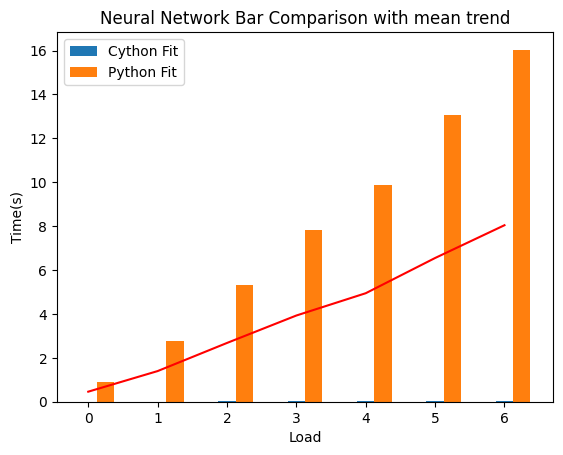

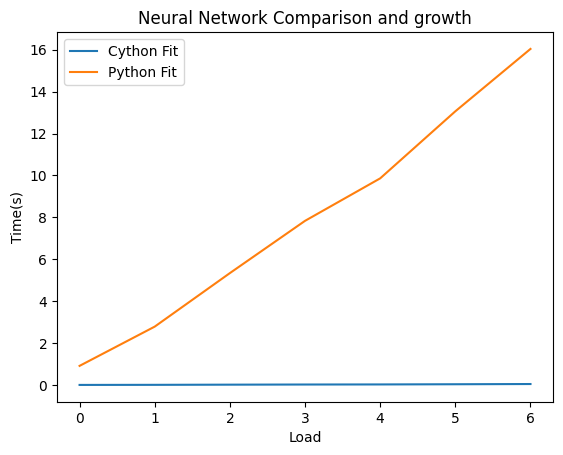

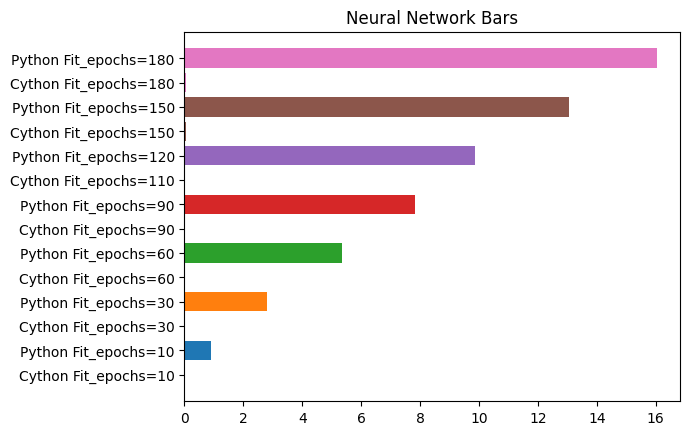

In [17]:
tester.plot("results/resultnn.json", "Neural Network")

# Conclusions 

We can conclude that there is a significative improvement in performance while using Cython over Python in this algorithm. For-loops in Python are notoriously slow when there are many iterations, and in typical matrix multiplication the complexity is of $O^3$, so many iterations will be requiered.
The biggest improvement in this case comes from using Cython (C) for-loops instead of Python ones.

# Find primes

A natural number is called a prime number or prime, if it is greater than 1 and cannot be written as the product of 2 natural numbers. A numbers that are not prime are called composite numbers. 

The concept of prime number is so important in the branches of mathematics that it has been generalized in various ways. As the prime elements in a ring, prime ideals, prime knots, among others. Similarly, its applications in mathematics extend to the concept of "relative primes" to define primitive roots of unity, the definition of a finite body, the definition of a stellated polygon of n sides and the definition of the canonical representation of a rational number. In turn, they are implemented in computation for the RSA algorithm. The security of this algorithm lies in the complexity of factoring a number into its prime factors.


The sieve of Eratosthenes is an ancient algorithm for finding prime numbers, the first known reference is to the introduction to arithmoetics by Nicomachus of Gerasa, a book from the beginning of the second century A.D. that describes it and attributes it to Eratosthenes of Cyrene. 

Its process is very simple, you list all the natural numbers between 2 and n, and you select the numbers and discard the numbers that are the dividend of the selected number. 

The problem with this algorithm lies in the great time complexity of calculating all the prime numbers with $O(n \log n)$ operations, a direct consequence of the fact that the harmonic series of primes approximates $O(n \log n)$ asymptotically. 

Pritchard's work reduced the memory requirement at the cost of a large constant factor, so the resulting performance is $O(n)$ and an acceptable memory requirement, it is not faster than a reasonably Wheel Factorized basic sieve of Eratosthenes for practical sieving ranges.

In [19]:
from Fast.FindPrimes import find_primes as cfind_primes
from Pure.FindPrimes import find_primes as pfind_primes

In [20]:
#timeit(cfind_primes, 10000000)
filename = f"results/resultprimes{str(time.time())}.json"

cfind = Binder(cfind_primes, name="Cython primes")
pfind = Binder(pfind_primes, name="Python primes")
tester = Tester([cfind, pfind])
tester.test(loads=[([100000], {}),
                    ([300000], {}),
                   ([500000], {}),
                  ([1000000], {}),iters = 390, save_to_file = filename)


file saved


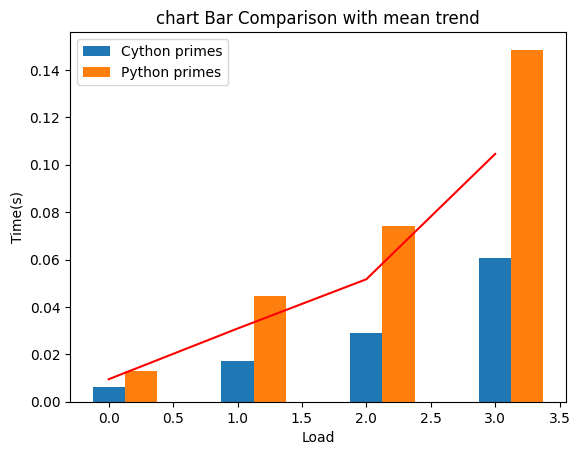

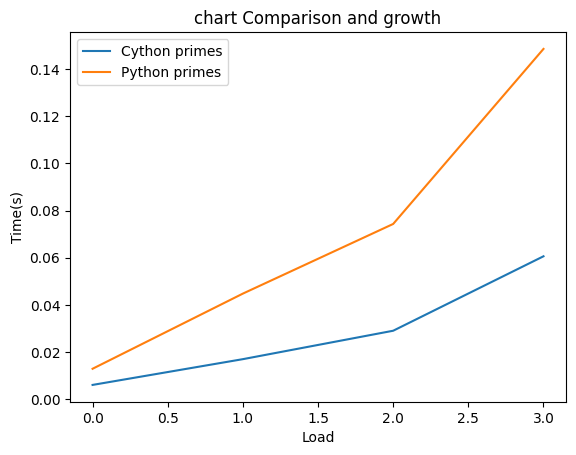

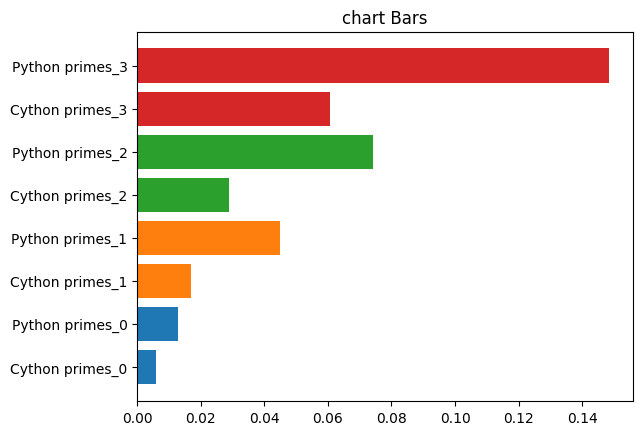

In [25]:
tester.plot("results/resultprimes.json")


# Conclusions
We can still observe an improvement in performance while using Cython, although it is not as significant as with the neural network algorithm. Cython optimizes the loops by using them at a low level which allows an approximation to Pritchard optimization, something that Python hardly allows because of its structure handling.

# Proof Of Work

A proof of work is a system that aims to discourage and hinder unwanted behavior. This is a very important part of cryptography and currently popularized by Bitcoin as a basis for consensus in a decentralized permissionless network, in which moners compete, where each miner experiences a probability of success proportional to the computational effort made. 

Bitcoin is based on the hashcash PoW proposed by Adam Black in 1997, where a fast verification mechanism is established that requires a selectable amount of work to compute, but the proof can be verified efficiently. Although this strategy was born for handling spam, email and retweeting, it is currently used for bitcoin mining. It is currently used for bitcoin mining, where the miner runs a program that collects unconfirmed transactions from network users and can form a "block" if its hash meets the network's difficulty target. Thus, as in hashcash, the miners must brute force the nonce that allows the block to be acceptable.

In [27]:
from Fast.POW import POW as cPOW
from Pure.POW import POW as pPOW

In [29]:
#timeit(cfind_primes, 10000000)
filename = f"results/resultPOW{str(time.time())}.json"

cb = Binder(cPOW, name="Cython POW")
pb = Binder(pPOW, name="Python POW")
tester = Tester([cb, pb])
tester.test(loads=[(["ポケモン".encode(), 2**250], {}),
                    (["ポケモン".encode(), 2**240], {}),
                   (["ポケモン".encode(), 2**238], {}),
                  (["ポケモン".encode(), 2**235], {}), 
                  (["ポケモン".encode(), 2**231], {})],
                    show_names = ["2**250","2**240","2**238","2**235", "2**231"],
            iters = 30, save_to_file = filename)
print("File Saved")

File Saved


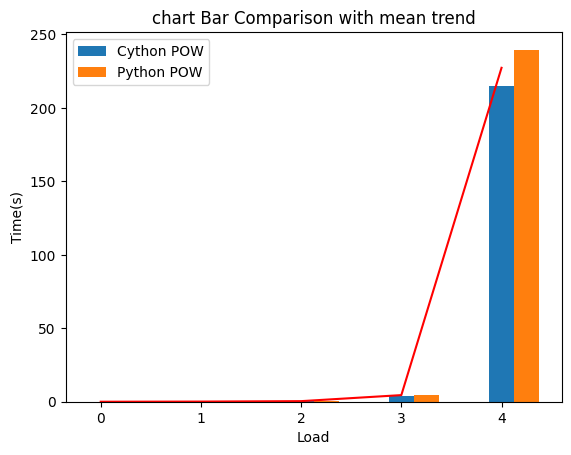

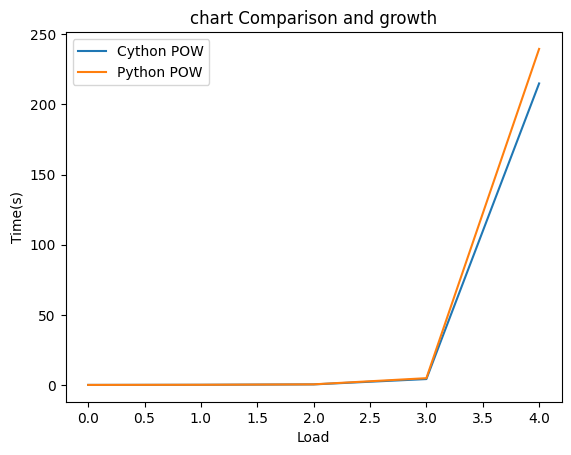

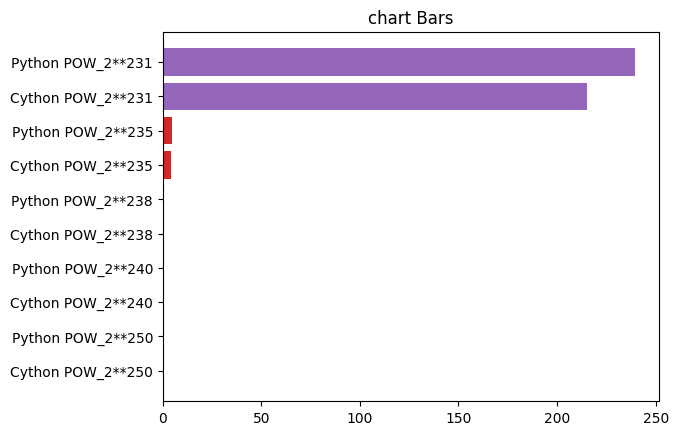

In [31]:
tester.plot("results/resultPOW.json")

# Conclusions

The improvement in performance that Cython provides does not appear to be significant in this case. We hypothesize that this is due to the interaction that some operations still have with Python, namely the hashing and comparing of the data. Further improvements could be made by using C level libraries and comparisons, where we expect a better performance from Cython. Due to the way POW works, reducing the target will make the complexity of the algorithm to grow exponentially.  

# REFERENCES

* Behnel, S., Bradshaw, R., Citro, C., Dalcin, L., Seljebotn, D. S., & Smith, K. (2011). Cython: The Best of Both Worlds. Computing in Science & Engineering, 13(2), 31–39. doi:10.1109/mcse.2010.118 

* Copeland, B. Jack, ed. (2004). The Essential Turing. Oxford University Press. p. 403. ISBN 978-0-19-825080-7.

* HECHT-NIELSEN, R. (1992). Theory of the Backpropagation Neural Network**Based on “nonindent” by Robert Hecht-Nielsen, which appeared in Proceedings of the International Joint Conference on Neural Networks 1, 593–611, June 1989. © 1989 IEEE. Neural Networks for Perception, 65–93. doi:10.1016/b978-0-12-741252-8.500

* Pritchard, Paul, "Linear prime-number sieves: a family tree," Sci. Comput. Programming 9:1 (1987), pp. 17–35

* Hoche, Richard, ed. (1866), Nicomachi Geraseni Pythagorei Introductionis arithmeticae libri II, Leipzig: B.G. Teubner, p. 

* “Open source P2P money,” Bitcoin. [Online]. Available: https://bitcoin.org/bitcoin.pdf. [Accessed: 18-Nov-2022].

* Jakobsson, Markus; Juels, Ari (1999). "Proofs of Work and Bread Pudding Protocols". Secure Information Networks: Communications and Multimedia Security. Kluwer Academic Publishers: 258–272. doi:10.1007/978-0-387-35568-9_18.